<a href="https://colab.research.google.com/github/saadspark/Machine-Learning/blob/main/Liner_Regression_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
filePath = '/content/drive/MyDrive/Mechine_Learning_DataSets/Salary_Data.csv'
df = pd.read_csv(filePath)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [95]:
distinct_genders = df['Gender'].unique()
print("Distinct Genders:")
print(distinct_genders)
print('----------------------------------------')
distinct_edu_level = df['Education Level'].unique()
print("Distinct Education Level:")
print(distinct_edu_level)


Distinct Genders:
['Male' 'Female' nan]
----------------------------------------
Distinct Education Level:
["Bachelor's" "Master's" 'PhD' nan]


In [96]:
print('----------------------------------------')
distinct_job_title = df['Job Title'].unique()
print("Distinct Job Title:")
print(distinct_job_title)

----------------------------------------
Distinct Job Title:
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business 

In [97]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [98]:
df = df.dropna()

In [99]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [100]:
from sklearn.preprocessing import LabelEncoder

# Label encode Education Level (Bachelor's < Master's < PhD)
edu_encoder = LabelEncoder()
df['Education Level'] = edu_encoder.fit_transform(df['Education Level'])

In [101]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Male
0,32.0,0,Software Engineer,5.0,90000.0,True
1,28.0,1,Data Analyst,3.0,65000.0,False
2,45.0,2,Senior Manager,15.0,150000.0,True
3,36.0,0,Sales Associate,7.0,60000.0,False
4,52.0,1,Director,20.0,200000.0,True


In [104]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


You replace each job title with the average target value (e.g., salary, experience, etc.).

In [105]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=['Job Title'])
df['Job Title'] = target_encoder.fit_transform(df['Job Title'], df['Salary'])


In [106]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Gender_Male
0,32.0,0,99201.143514,5.0,90000.0,True
1,28.0,1,96594.544437,3.0,65000.0,False
2,45.0,2,109006.512616,15.0,150000.0,True
3,36.0,0,93402.895477,7.0,60000.0,False
4,52.0,1,113513.075694,20.0,200000.0,True


In [109]:
from sklearn.model_selection import train_test_split
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [112]:
model.score(X_test, y_test)

0.9352254900563877

In [114]:
model.predict(X_test)

array([194182.62685571,  85386.85001674, 131490.55349312,  86814.5392936 ,
       142123.35755923, 148648.97972997, 145280.50473135, 107422.231984  ,
        54730.20894684,  97404.93352319, 140394.67508707, 151764.50542178,
        39161.07985447,  88514.64977846, 120838.25840006,  54730.20894684,
        75612.84988734,  51152.56041921,  84060.27583143,  96359.50402766,
       125604.72221984, 114290.69797007, 167205.48912161,  55617.92330788,
        86814.5392936 ,  52076.11310834, 172809.43905398,  38550.69104619,
       114480.8366437 , 171828.5521409 ,  43229.28558884, 105375.89484941,
        60093.40273222, 141022.51192509, 102394.26474881,  24758.43586592,
       175719.56800431,  57228.34162786, 147628.51943126,  54443.59766783,
        42177.01305705,  88636.18882125, 181721.9053872 , 194498.05712468,
        47439.01668146, 139394.67345807, 116385.1619381 ,  55607.86721023,
        53289.15103935,  41875.6126039 , 156317.72873555,  94740.0016802 ,
       127456.98322611,  

In [115]:
predictions = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': predictions})
print("Comparison of Actual and Predicted Salaries:")
print(comparison_df.head())

Comparison of Actual and Predicted Salaries:
     Actual Salary  Predicted Salary
329       180000.0     194182.626856
33         65000.0      85386.850017
15        125000.0     131490.553493
316        80000.0      86814.539294
57        140000.0     142123.357559


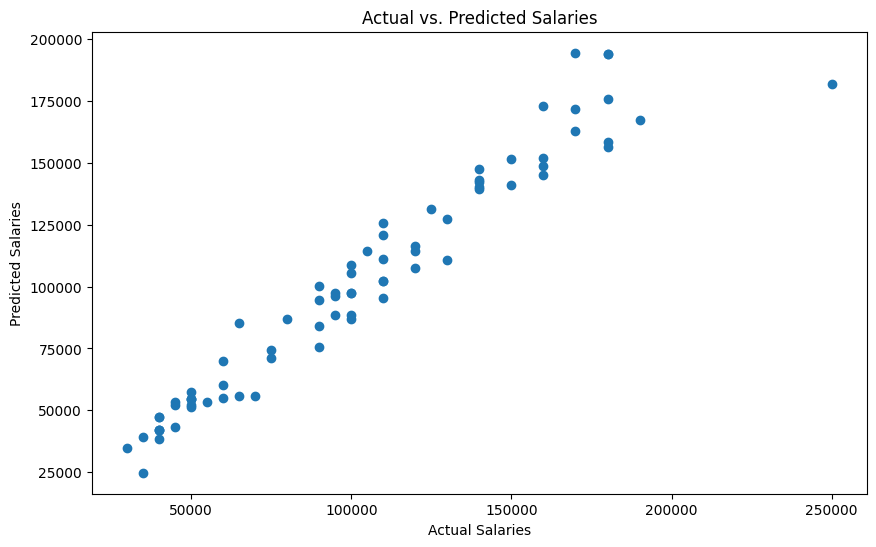

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs. Predicted Salaries")
plt.show()

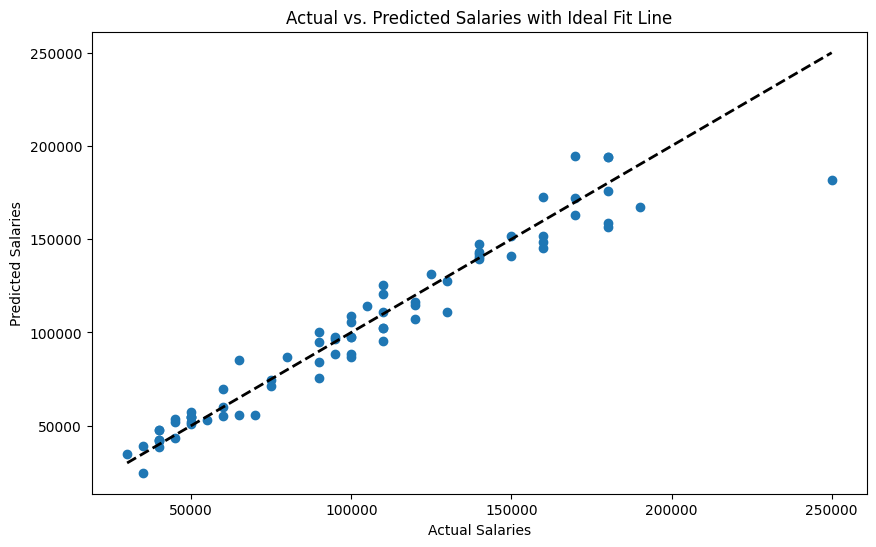

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs. Predicted Salaries with Ideal Fit Line")
plt.show()